## Code to...

1. Read in all data files 

2. Average light and dark polarization values for each unique sample 

3. light - dark 

4. Compare total polarization test set to each polarization sample

5. Visualize the differences in | polarization mean - unique polarization angle |

### 1. Read in data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

directory = 'Desktop/HNAV51_polar'

csv_files = [file for file in os.listdir(directory) if file.endswith('.csv')]

light_port = [file for file in csv_files if file.startswith('polar') and 'p2' in file and 'L' in file]
dark_port = [file for file in csv_files if file.startswith('polar') and 'p2' in file and 'D' in file]

light_sbd = [file for file in csv_files if file.startswith('polar') and 's3' in file and 'L' in file]
dark_sbd = [file for file in csv_files if file.startswith('polar') and 's3' in file and 'D' in file]


light_port_avgs = {}
dark_port_avgs = {}

light_sbd_avgs = {}
dark_sbd_avgs = {}

### 2. Average all light and dark samples, store values in dictionaries

#### Light Port Averages

In [2]:
for file in light_port:
    file_path = os.path.join(directory, file)
    dfL_P = pd.read_csv(file_path, nrows=14)  # Read rows 2-14, skipping header

    # Exclude the first row (metadata) and select columns 'LU_0' to the second to last column
    subset_df_LP = dfL_P.iloc[1:, 22:-1]

    # Convert values to numeric, excluding non-convertible values (coerced to NaN)
    subset_df_numeric_LP = subset_df_LP.apply(pd.to_numeric, errors='coerce')

    # Calculate the mean, excluding NaN values
    row_averages_LP = subset_df_numeric_LP.mean(axis=0)

    # Extract the entire filename (without extension) as the DataFrame name
    df_name_LP = os.path.splitext(file)[0]

    # Store the row averages in the averages_df_dict with the DataFrame name as the key
    light_port_avgs[df_name_LP] = pd.DataFrame({'Average': row_averages_LP})

#### Light Starboard Averages

In [3]:
for file in light_sbd:
    file_path = os.path.join(directory, file)
    dfL_S = pd.read_csv(file_path, nrows=14)  # Read rows 2-14, skipping header

    # Exclude the first row (metadata) and select columns 'LU_0' to the second to last column
    subset_df_LS = dfL_S.iloc[1:, 22:-1]

    # Convert values to numeric, excluding non-convertible values (coerced to NaN)
    subset_df_numeric_LS = subset_df_LS.apply(pd.to_numeric, errors='coerce')

    # Calculate the mean, excluding NaN values
    row_averages_LS = subset_df_numeric_LS.mean(axis=0)

    # Extract the entire filename (without extension) as the DataFrame name
    df_name_LS = os.path.splitext(file)[0]

    # Store the row averages in the averages_df_dict with the DataFrame name as the key
    light_sbd_avgs[df_name_LS] = pd.DataFrame({'Average': row_averages_LS})

#### Port and Starboard Dark Averages

In [4]:
for file in dark_port:
    file_path = os.path.join(directory, file)
    dfD_P = pd.read_csv(file_path) 

    # Exclude the first row (metadata) and select columns 'LU_0' to the second to last column
    subset_df_DP = dfD_P.iloc[1:, 22:-1]

    # Convert values to numeric, excluding non-convertible values (coerced to NaN)
    subset_df_numeric_DP = subset_df_DP.apply(pd.to_numeric, errors='coerce')

    # Calculate the mean, excluding NaN values
    row_averages_DP = subset_df_numeric_DP.mean(axis=0)

    # Extract the entire filename (without extension) as the DataFrame name
    df_name_DP = os.path.splitext(file)[0]

    # Store the row averages in the averages_df_dict with the DataFrame name as the key
    dark_port_avgs[df_name_DP] = pd.DataFrame({'Average': row_averages_DP})

for file in dark_sbd:
    file_path = os.path.join(directory, file)
    dfD_S = pd.read_csv(file_path)  # Read rows 2-14, skipping header

    # Exclude the first row (metadata) and select columns 'LU_0' to the second to last column
    subset_df_DS = dfD_S.iloc[1:, 22:-1]

    # Convert values to numeric, excluding non-convertible values (coerced to NaN)
    subset_df_numeric_DS = subset_df_DS.apply(pd.to_numeric, errors='coerce')

    # Calculate the mean, excluding NaN values
    row_averages_DS = subset_df_numeric_DS.mean(axis=0)

    # Extract the entire filename (without extension) as the DataFrame name
    df_name_DS = os.path.splitext(file)[0]

    # Store the row averages in the averages_df_dict with the DataFrame name as the key
    dark_sbd_avgs[df_name_DS] = pd.DataFrame({'Average': row_averages_DS})



In [5]:
type(light_port_avgs['polar0p2_HyperNav0051_20231212_225622_SATYLZ0002'])

pandas.core.frame.DataFrame

In [6]:
light_port_avgs['polar0p2_HyperNav0051_20231212_225622_SATYLZ0002'] - dark_port_avgs['polar0p2_HyperNav0051_20231212_225622_SATYDZ0002'] 

,Average
LU_0,15.923077
LU_1,32.692308
LU_2,27.230769
LU_3,20.384615
LU_4,24.897436
...,...
LU_2043,6007.538462
LU_2044,5971.179487
LU_2045,5851.051282
LU_2046,5728.435897


In [7]:
for key in light_port_avgs.keys():
    print(key)

polar0p2_HyperNav0051_20231212_225622_SATYLZ0002
polar165p2_HyperNav0051_20231212_232748_SATYLZ0002
polar180p2_HyperNav0051_20231212_232921_SATYLZ0002
polar90p2_HyperNav0051_20231212_231632_SATYLZ0002
polar210p2_HyperNav0051_20231212_233915_SATYLZ0002
polar75p2_HyperNav0051_20231212_231357_SATYLZ0002
polar345p2_HyperNav0051_20231213_000059_SATYLZ0002
polar135p2_HyperNav0051_20231212_232350_SATYLZ0002
polar105p2_HyperNav0051_20231212_231904_SATYLZ0002
polar225p2_HyperNav0051_20231212_234139_SATYLZ0002
polar60p2_HyperNav0051_20231212_231107_SATYLZ0002
polar255p2_HyperNav0051_20231212_234512_SATYLZ0002
polar30p2_HyperNav0051_20231212_230133_SATYLZ0002
polar315p2_HyperNav0051_20231212_235532_SATYLZ0002
polar270p2_HyperNav0051_20231212_234716_SATYLZ0002
polar45p2_HyperNav0051_20231212_230852_SATYLZ0002
polar330p2_HyperNav0051_20231212_235722_SATYLZ0002
polar150p2_HyperNav0051_20231212_232536_SATYLZ0002
polar120p2_HyperNav0051_20231212_232133_SATYLZ0002
polar240p2_HyperNav0051_20231212_23433

In [8]:
for key in dark_port_avgs.keys():
    print(key)

polar150p2_HyperNav0051_20231212_232536_SATYDZ0002
polar330p2_HyperNav0051_20231212_235722_SATYDZ0002
polar120p2_HyperNav0051_20231212_232133_SATYDZ0002
polar255p2_HyperNav0051_20231212_234512_SATYDZ0002
polar315p2_HyperNav0051_20231212_235532_SATYDZ0002
polar30p2_HyperNav0051_20231212_230133_SATYDZ0002
polar270p2_HyperNav0051_20231212_234716_SATYDZ0002
polar45p2_HyperNav0051_20231212_230852_SATYDZ0002
polar285p2_HyperNav0051_20231212_234859_SATYDZ0002
polar300p2_HyperNav0051_20231212_235039_SATYDZ0002
polar195p2_HyperNav0051_20231212_233124_SATYDZ0002
polar15p2_HyperNav0051_20231212_230502_SATYDZ0002
polar240p2_HyperNav0051_20231212_234338_SATYDZ0002
polar180p2_HyperNav0051_20231212_232921_SATYDZ0002
polar90p2_HyperNav0051_20231212_231632_SATYDZ0002
polar0p2_HyperNav0051_20231212_225622_SATYDZ0002
polar165p2_HyperNav0051_20231212_232748_SATYDZ0002
polar135p2_HyperNav0051_20231212_232350_SATYDZ0002
polar345p2_HyperNav0051_20231213_000059_SATYDZ0002
polar225p2_HyperNav0051_20231212_2341

### 3. Subtract dark counts from light counts, store in dictionary 

In [9]:
# Create a new dictionary to store the results of subtraction
port_C_dict = {}

for port_light_key, port_light_value in light_port_avgs.items():
    port_dark_key = port_light_key.replace('L', 'D')
    
    if port_dark_key in dark_port_avgs:
        port_dark_value = dark_port_avgs[port_dark_key]
        port_C_dict[port_light_key] = port_light_value - port_dark_value

In [10]:
# Create a new dictionary to store the results of subtraction
sbd_C_dict = {}

for sbd_light_key, sbd_light_value in light_sbd_avgs.items():
    sbd_dark_key = sbd_light_key.replace('L', 'D')
    
    if sbd_dark_key in dark_sbd_avgs:
        sbd_dark_value = dark_sbd_avgs[sbd_dark_key]
        sbd_C_dict[sbd_light_key] = sbd_light_value - sbd_dark_value

In [11]:
sbd_C_dict

{'polar210s3_HyperNav0051_20231213_005821_SATYLZ0003':              Average
 LU_0       14.115385
 LU_1       20.807692
 LU_2       15.000000
 LU_3       19.923077
 LU_4       27.884615
 ...              ...
 LU_2043  6034.730769
 LU_2044  5954.538462
 LU_2045  6005.576923
 LU_2046  5899.038462
 LU_2047  5735.269231
 
 [2048 rows x 1 columns],
 'polar30s3_HyperNav0051_20231213_003421_SATYLZ0003':              Average
 LU_0        9.769231
 LU_1       16.423077
 LU_2       12.192308
 LU_3       12.230769
 LU_4       11.807692
 ...              ...
 LU_2043  6047.307692
 LU_2044  5957.153846
 LU_2045  5982.192308
 LU_2046  5892.846154
 LU_2047  5683.884615
 
 [2048 rows x 1 columns],
 'polar180s3_HyperNav0051_20231213_005422_SATYLZ0003':              Average
 LU_0       11.115385
 LU_1       24.692308
 LU_2        5.923077
 LU_3       24.500000
 LU_4       29.769231
 ...              ...
 LU_2043  6053.384615
 LU_2044  5980.884615
 LU_2045  5976.461538
 LU_2046  5902.384615
 LU_2047  570

### 4. Compare total polarization response to unique angles 

##### Calculate the total response 

In [12]:
# Create a list to store individual DataFrames
total_sbd_avg = []
total_prt_avg = []

for key_sbd, value_sbd in sbd_C_dict.items():
    # Convert each key-value pair to a DataFrame
    df_sbd = pd.DataFrame(value_sbd, columns=['Average'])
    
    # Add the DataFrame to the list
    total_sbd_avg.append(df_sbd)

# Concatenate all DataFrames along the columns
result_df_sbd = pd.concat(total_sbd_avg, axis=1)

# Calculate the mean along the columns
result_column_sbd = result_df_sbd.mean(axis=1)

# Convert the result column to a dictionary
total_sbd_avg = {'Averaged_Column': result_column_sbd}

#made into pandas dataframe instead of dictionary for calculations 
total_sbd_avgs = pd.DataFrame.from_dict(total_sbd_avg, orient='index').transpose()

# Display the result dictionary
print(total_sbd_avgs)

         Averaged_Column
LU_0           16.379808
LU_1           19.444979
LU_2           19.556090
LU_3           19.160256
LU_4           21.177885
...                  ...
LU_2043      6045.760684
LU_2044      5978.650641
LU_2045      5983.399573
LU_2046      5889.092949
LU_2047      5700.835470

[2048 rows x 1 columns]


In [13]:
for key_prt, value_prt in port_C_dict.items():
    # Convert each key-value pair to a DataFrame
    df_prt = pd.DataFrame(value_prt, columns=['Average'])
    
    # Add the DataFrame to the list
    total_prt_avg.append(df_prt)

# Concatenate all DataFrames along the columns
result_df_prt = pd.concat(total_prt_avg, axis=1)

# Calculate the mean along the columns
result_column_prt = result_df_prt.mean(axis=1)

# Convert the result column to a dictionary
total_prt_avg = {'Averaged_Column': result_column_prt}

#made into pandas dataframe instead of dictionary for calculations 
total_prt_avgs = pd.DataFrame.from_dict(total_prt_avg, orient='index').transpose()

# Display the result dictionary
print(total_prt_avgs)

         Averaged_Column
LU_0           24.519231
LU_1           20.456731
LU_2           16.411325
LU_3           21.957265
LU_4           18.238782
...                  ...
LU_2043      6048.258013
LU_2044      5986.640491
LU_2045      5876.882479
LU_2046      5783.608974
LU_2047      5713.519231

[2048 rows x 1 columns]


##### Subtract the average from unique values

In [14]:
prt_result_dfs_dict = {}

total_prt_avgs_df = pd.DataFrame(data={'Averaged_Column': total_prt_avgs['Averaged_Column']}, index=total_prt_avgs.index)

# Loop through all key-value pairs in sbd_C_dict
for key, prt_df in port_C_dict.items():
    # Check if sbd_df is a DataFrame and has the same shape as total_sbd_avgs_df
    if isinstance(prt_df, pd.DataFrame) and prt_df.shape == total_prt_avgs_df.shape:
        prt_result_df = abs(total_prt_avgs_df['Averaged_Column'].sub(prt_df['Average']))
        prt_result_dfs_dict[key] = prt_result_df
    else:
        print(f"Skipping invalid DataFrame for key {key}")

# Concatenate the result DataFrames along the columns and use filenames as headers
prt_final_result_df = pd.concat(prt_result_dfs_dict.values(), axis=1, keys=prt_result_dfs_dict.keys())

# Display the final result DataFrame
print(prt_final_result_df)

prt_final_result_df.to_csv('/Users/abailess/Desktop/HNAV51_polar/prt_final_result_df.csv', index=False)

         polar0p2_HyperNav0051_20231212_225622_SATYLZ0002  \
LU_0                                             8.596154   
LU_1                                            12.235577   
LU_2                                            10.819444   
LU_3                                             1.572650   
LU_4                                             6.658654   
...                                                   ...   
LU_2043                                         40.719551   
LU_2044                                         15.461004   
LU_2045                                         25.831197   
LU_2046                                         55.173077   
LU_2047                                         36.980769   

         polar165p2_HyperNav0051_20231212_232748_SATYLZ0002  \
LU_0                                              0.980769    
LU_1                                             10.889423    
LU_2                                              6.488248    
LU_3           

In [15]:
sbd_result_dfs_dict = {}

total_sbd_avgs_df = pd.DataFrame(data={'Averaged_Column': total_sbd_avgs['Averaged_Column']}, index=total_sbd_avgs.index)

# Loop through all key-value pairs in sbd_C_dict
for key, sbd_df in sbd_C_dict.items():
    # Check if sbd_df is a DataFrame and has the same shape as total_sbd_avgs_df
    if isinstance(sbd_df, pd.DataFrame) and sbd_df.shape == total_sbd_avgs_df.shape:
        sbd_result_df = abs(total_sbd_avgs_df['Averaged_Column'].sub(sbd_df['Average']))
        sbd_result_dfs_dict[key] = sbd_result_df
    else:
        print(f"Skipping invalid DataFrame for key {key}")

# Concatenate the result DataFrames along the columns and use filenames as headers
sbd_final_result_df = pd.concat(sbd_result_dfs_dict.values(), axis=1, keys=sbd_result_dfs_dict.keys())

# Display the final result DataFrame
print(sbd_final_result_df)

sbd_final_result_df.to_csv('/Users/abailess/Desktop/HNAV51_polar/sbd_final_result_df.csv', index=False)

         polar210s3_HyperNav0051_20231213_005821_SATYLZ0003  \
LU_0                                              2.264423    
LU_1                                              1.362714    
LU_2                                              4.556090    
LU_3                                              0.762821    
LU_4                                              6.706731    
...                                                    ...    
LU_2043                                          11.029915    
LU_2044                                          24.112179    
LU_2045                                          22.177350    
LU_2046                                           9.945513    
LU_2047                                          34.433761    

         polar30s3_HyperNav0051_20231213_003421_SATYLZ0003  \
LU_0                                              6.610577   
LU_1                                              3.021902   
LU_2                                              7.36378

#### Visualize the polarization response

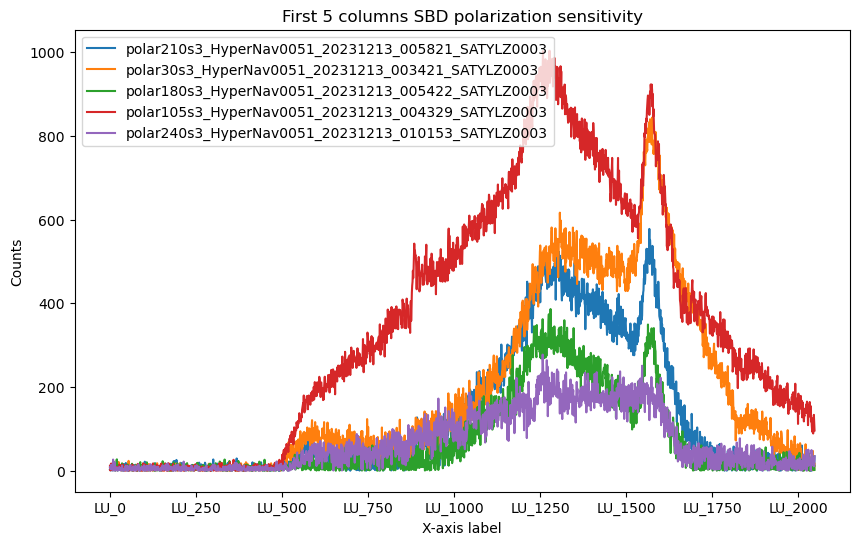

In [17]:
sbd_plot = sbd_final_result_df.iloc[:, :5]

# Plot the columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for column in sbd_plot.columns:
    plt.plot(sbd_plot[column], label=column)

plt.xlabel('X-axis label')
plt.ylabel('Counts')
plt.legend()
plt.title('First 5 columns SBD polarization sensitivity')

x_ticks = np.arange(0, len(sbd_plot), 250)
plt.xticks(x_ticks)

plt.show()

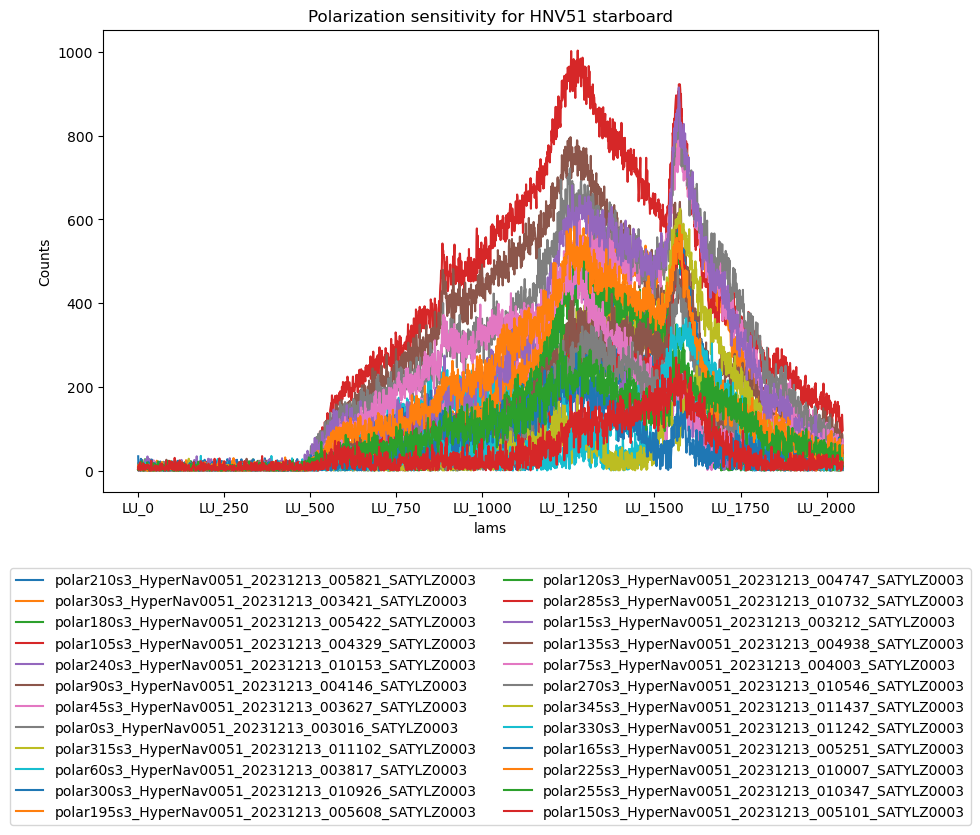

In [22]:
sbd_plot = sbd_final_result_df.iloc[:, :]

# Plot the columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for column in sbd_plot.columns:
    plt.plot(sbd_plot[column], label=column)

plt.xlabel('lams')
plt.ylabel('Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjust the parameters as needed
plt.title('Polarization sensitivity for HNV51 starboard')

x_ticks = np.arange(0, len(sbd_plot), 250)
plt.xticks(x_ticks)

plt.show()

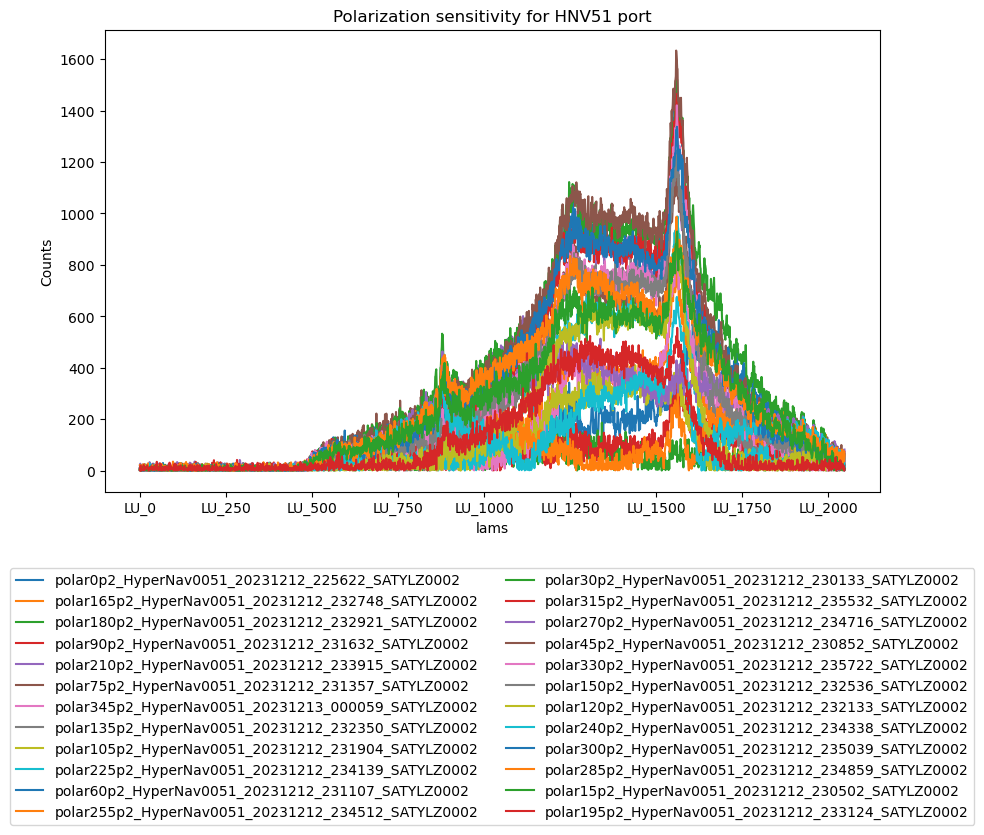

In [24]:
prt_plot = prt_final_result_df.iloc[:, :]

# Plot the columns
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
for column in prt_plot.columns:
    plt.plot(prt_plot[column], label=column)

plt.xlabel('lams')
plt.ylabel('Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)  # Adjust the parameters as needed
plt.title('Polarization sensitivity for HNV51 port')

x_ticks = np.arange(0, len(prt_plot), 250)
plt.xticks(x_ticks)

plt.show()

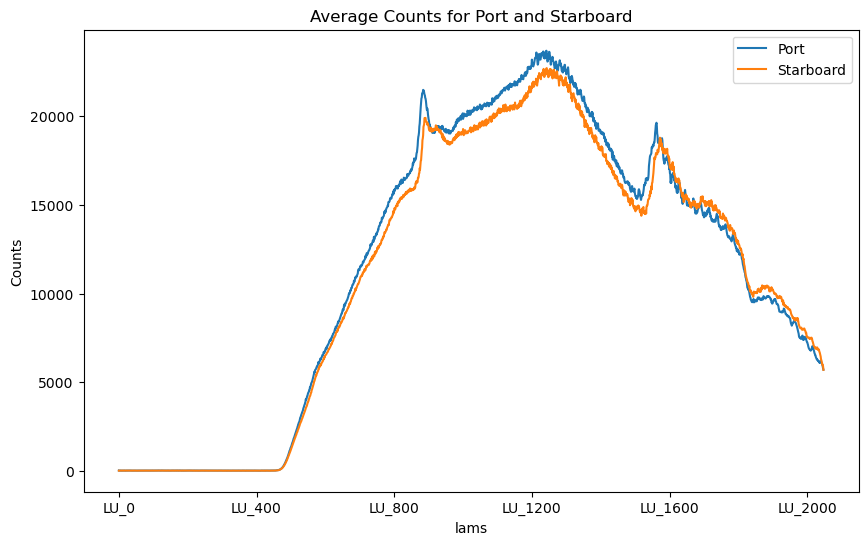

In [31]:
plt.figure(figsize=(10, 6))  # Set the figure size to 10x6 inches

plt.plot(total_prt_avgs, label='Port')
plt.plot(total_sbd_avgs, label='Starboard')
plt.xlabel('lams')
plt.ylabel('Counts')
plt.title('Average Counts for Port and Starboard')
plt.legend(labels=['Port', 'Starboard'])

x_ticks = np.arange(0, len(prt_plot), 400)
plt.xticks(x_ticks)

plt.show()
